In [95]:
import sys
import os
import importlib
import warnings
warnings.filterwarnings('ignore')
print(f" ><>< Directorio actual: {os.getcwd()}  ><>< ")
def get_environment_name():
    if 'CONDA_DEFAULT_ENV' in os.environ:
        return os.environ['CONDA_DEFAULT_ENV']
    elif 'VIRTUAL_ENV' in os.environ:
        return os.path.basename(os.environ['VIRTUAL_ENV'])
    elif 'conda' in sys.executable.lower():
        path_parts = sys.executable.split(os.sep)
        if 'envs' in path_parts:
            env_index = path_parts.index('envs')
            if env_index + 1 < len(path_parts):
                return path_parts[env_index + 1]
        return 'base'
    else:
        return 'sistema (sin entorno virtual)'
env_name = get_environment_name()
print(f" ><>< Nombre del entorno: {env_name} ><><><")
packages_to_check = [
    'pandas',
    'numpy', 
    'matplotlib',
    'seaborn',
    'plotly',
    'sklearn',
    'boto3',
    'jupyter',
    'ipykernel',
    'xgboost'
]

installed_packages = {}
missing_packages = []

for package_name in packages_to_check:
        if package_name == 'sklearn':
            import sklearn as pkg
        else:
            pkg = importlib.import_module(package_name)
        
        version = getattr(pkg, '__version__', 'ok')
        installed_packages[package_name] = version
        print(f" {package_name:12} v{version}")

#Orden al estilo P8P
# Librería estándar de Python
from collections import Counter
from datetime import datetime, timedelta
from io import StringIO
import warnings
# Dependencias de terceros
# AWS
import boto3
# Ciencia de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt       
# Aprendizaje automático clásico (scikit‑learn + imbalanced‑learn)
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import ADASYN, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import (
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier,
)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,auc
)
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    LabelEncoder,
    MinMaxScaler,
    OrdinalEncoder,
    StandardScaler,
)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.svm import SVC
# XGBoost
import xgboost as xgb
# Deep Learning (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')
print("Etapa Verificación de bibliotecas en Kernel : ✓")

 ><>< Directorio actual: c:\Users\usuario\Desktop\deploy_devices  ><>< 
 ><>< Nombre del entorno: ml_permanente ><><><
 pandas       v2.2.3
 numpy        v1.26.4
 matplotlib   v3.10.0
 seaborn      v0.13.2
 plotly       v6.2.0
 sklearn      v1.6.1
 boto3        v1.39.9
 jupyter      vok
 ipykernel    v6.29.5
 xgboost      v3.0.2
Etapa Verificación de bibliotecas en Kernel : ✓


**Desarrollo de enigma**

In [96]:
cred_df = pd.read_csv(r"C:\Users\usuario\Downloads\sanmi_accessKeys.csv")
aws_access_key_id     = cred_df.loc[0, 'Access key ID']
aws_secret_access_key = cred_df.loc[0, 'Secret access key']

In [97]:
s3 = boto3.client(
    's3',
    aws_access_key_id=aws_access_key_id,
    aws_secret_access_key=aws_secret_access_key,
    region_name='us-east-2'
)

In [98]:
BUCKET_NAME  = "aws-sam-cli-managed-default-samclisourcebucket-ko8qnsdeyujb"
OBJECT_KEY  = "elbaldedejuan/DS_MeLi/full_devices.csv"
s3 = boto3.client("s3")
def read_s3_csv(bucket: str, key: str) -> pd.DataFrame:
    """Descarga un CSV pequeño/mediano desde S3 y lo lee en un DataFrame."""
    obj = s3.get_object(Bucket=bucket, Key=key)
    csv_content = obj["Body"].read().decode("latin1")
    return pd.read_csv(StringIO(csv_content))
df    = read_s3_csv(BUCKET_NAME, OBJECT_KEY)
print("Conexión con datos en nube : ✓")

Conexión con datos en nube : ✓


In [99]:
df 

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
124489,2015-11-02,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,2015-11-02,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,2015-11-02,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,2015-11-02,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0


In [100]:
print(f"Dimensiones del dataset: {df.shape}")
print(f"Dispositivos únicos: {df['device'].nunique()}")
print(f"Rango de fechas: {df['date'].min()} a {df['date'].max()}")
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])
failure_dist = df['failure'].value_counts(normalize=True) * 100
print(f"\nDistribución de fallas:")
print(f"No falla (0): {failure_dist[0]:.1f}%")
print(f"Falla (1): {failure_dist[1]:.1f}%")
print(f"Ratio de desbalance: {failure_dist[0]/failure_dist[1]:.1f}:1")

Dimensiones del dataset: (124494, 12)
Dispositivos únicos: 1169
Rango de fechas: 2015-01-01 a 2015-11-02

Distribución de fallas:
No falla (0): 99.9%
Falla (1): 0.1%
Ratio de desbalance: 1173.5:1


INICIANDO EXPERIMENTACIÓN DE BALANCEADO CON SMOTENC
Preparando datos...
Categóricas: ['device']
   - device: 1169 categorías únicas
   - Muestras entrenamiento: 99595
   - Muestras test: 24899
   - Variables categóricas: 1
   - Ratio original de fallos: 0.0009

ANÁLISIS DE VARIABLES CATEGÓRICAS
Experimentando con diferentes estrategias de balanceado...
Revisando el --> no_balance
Completado - F1: 0.000, Recall: 0.000
Revisando el --> smote_1pct
SMOTE regular
Revisando el --> smote_2pct
SMOTE regular
Revisando el --> smote_5pct
SMOTE regular
Revisando el --> smote_10pct
SMOTE regular
Revisando el --> smote_20pct
SMOTE regular
Revisando el --> smotenc_1pct
Completado - F1: 0.154, Recall: 0.095
Revisando el --> smotenc_2pct
Completado - F1: 0.148, Recall: 0.095
Revisando el --> smotenc_5pct
Completado - F1: 0.143, Recall: 0.095
Revisando el --> smotenc_10pct
Completado - F1: 0.207, Recall: 0.143
Revisando el --> class_weight
Completado - F1: 0.000, Recall: 0.000
Revisando el --> undersamp

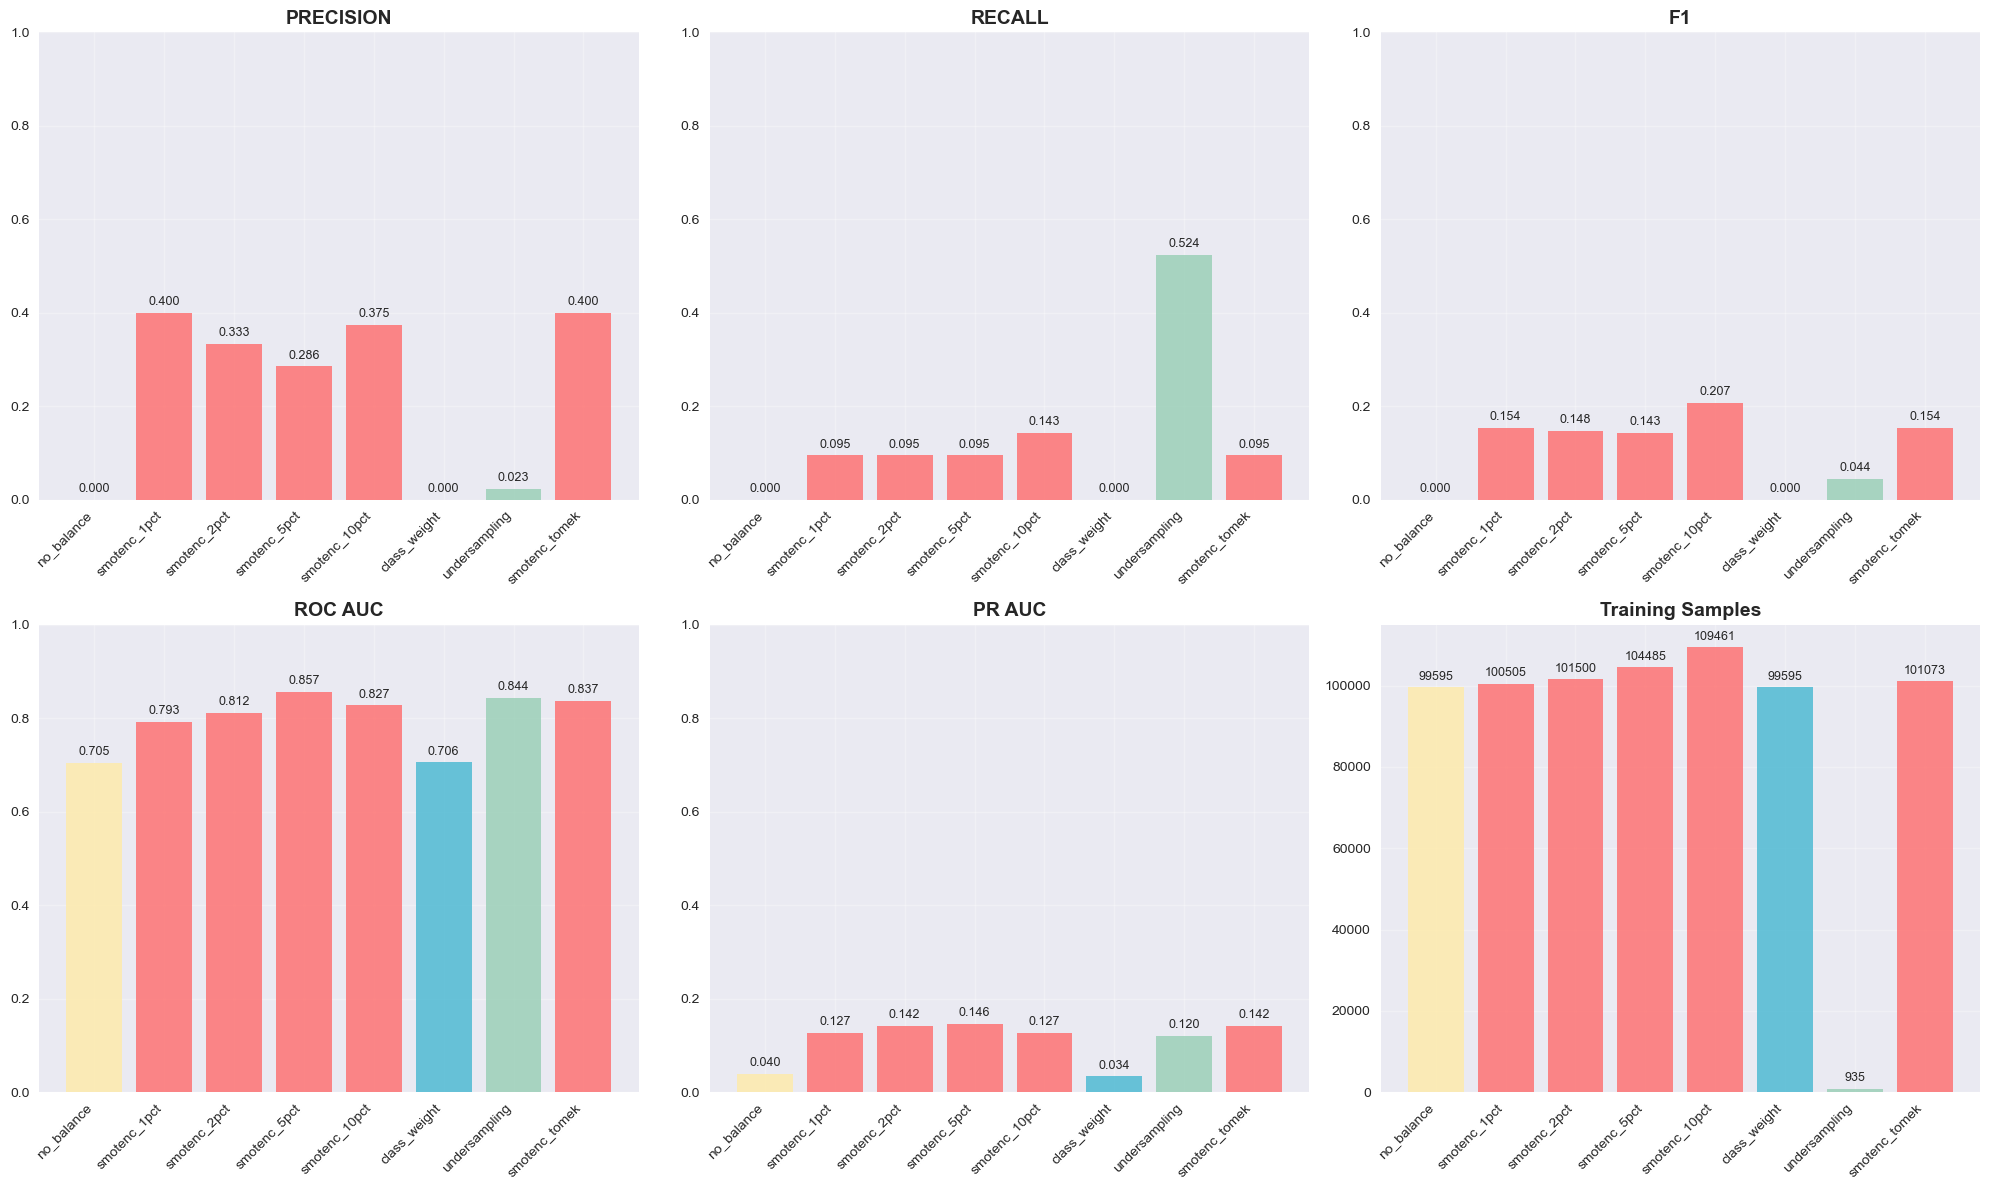

In [101]:
def preparandonos(df):
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year    
    df['month'] = df['date'].dt.month
    df['dayofweek']  = df['date'].dt.dayofweek
    df['day']   = df['date'].dt.day
    df['hour']  = df['date'].dt.hour
    X = df.drop(['failure', 'date'], axis=1)
    y = df['failure']
    categorical_columns = []
    for col in X.columns:
        if (X[col].dtype == 'object' or 
            (X[col].dtype in ['int64', 'float64'] and X[col].nunique() < 10) or
            col.lower() in ['device', 'type', 'category', 'class']):
            categorical_columns.append(col)   
    print(f"Categóricas: {categorical_columns}")
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"   - {col}: {X[col].nunique()} categorías únicas")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    cat_idx = [X.columns.get_loc(col) for col in categorical_columns]   
    return X_train, X_test, y_train, y_test, cat_idx, categorical_columns, label_encoders
def evaluando_modeloS(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)   
    return {
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'pr_auc': pr_auc,
        'confusion_matrix': cm,
        'classification_report': report
    }
def revision_ratios(X_train, y_train, X_test, y_test, cat_idx, categorical_columns):
    strategies = [
        ('no_balance', None, None),
        ('smote_1pct', 'smote', 0.01),
        ('smote_2pct', 'smote', 0.02),
        ('smote_5pct', 'smote', 0.05),
        ('smote_10pct', 'smote', 0.1),
        ('smote_20pct', 'smote', 0.2),
        ('smotenc_1pct', 'smotenc', 0.01), 
        ('smotenc_2pct', 'smotenc', 0.02),
        ('smotenc_5pct', 'smotenc', 0.05),
        ('smotenc_10pct', 'smotenc', 0.1),
        ('class_weight', 'class_weight', 'balanced'),
        ('undersampling', 'undersample', 0.1),
        ('smote_tomek', 'smote_tomek', 0.05),
        ('smotenc_tomek', 'smotenc_tomek', 0.05) 
    ]   
    results = {}   
    print("Experimentando con diferentes estrategias de balanceado...")
    for name, method, param in strategies:
        print(f"Revisando el --> {name}")        
        try:
            if method is None:
                model = RandomForestClassifier(random_state=42, n_estimators=100)
                X_final, y_final = X_train, y_train               
            elif method == 'class_weight':
                model = RandomForestClassifier(
                    class_weight='balanced', 
                    random_state=42, 
                    n_estimators=100
                )
                X_final, y_final = X_train, y_train              
            elif method == 'smote':
                if len(cat_idx) == 0:
                    sampler = SMOTE(
                        sampling_strategy=param,
                        random_state=42
                    )
                    X_final, y_final = sampler.fit_resample(X_train, y_train)
                else:
                    print(f"SMOTE regular")
                    continue
                model = RandomForestClassifier(random_state=42, n_estimators=100)          
            elif method == 'smotenc':
                if len(cat_idx) > 0:
                    sampler = SMOTENC(
                        categorical_features=cat_idx,
                        sampling_strategy=param,
                        random_state=42,
                        k_neighbors=5
                    )
                    X_final, y_final = sampler.fit_resample(X_train, y_train)
                else:
                    print(f"  Saltando SMOTENC - no hay variables categóricas")
                    continue
                model = RandomForestClassifier(random_state=42, n_estimators=100)         
            elif method == 'undersample':
                sampler = RandomUnderSampler(
                    sampling_strategy=param,
                    random_state=42
                )
                X_final, y_final = sampler.fit_resample(X_train, y_train)
                model = RandomForestClassifier(random_state=42, n_estimators=100)            
            elif method == 'smote_tomek':
                if len(cat_idx) == 0:
                    sampler = SMOTETomek(
                        sampling_strategy=param,
                        random_state=42
                    )
                    X_final, y_final = sampler.fit_resample(X_train, y_train)
                else:
                    print(f"Saltando SMOTE-Tomek")
                    continue
                model = RandomForestClassifier(random_state=42, n_estimators=100)               
            elif method == 'smotenc_tomek':
                if len(cat_idx) > 0:
                    sampler = SMOTETomek(
                        smote=SMOTENC(
                            categorical_features=cat_idx,
                            sampling_strategy=param,
                            random_state=42
                        ),
                        random_state=42
                    )
                    X_final, y_final = sampler.fit_resample(X_train, y_train)
                else:
                    print(f" Saltando SMOTENC-Tomek - no hay variables categóricas")
                    continue
                model = RandomForestClassifier(random_state=42, n_estimators=100)
            model.fit(X_final, y_final)
            result = evaluando_modeloS(model, X_test, y_test)
            result['train_samples'] = len(X_final)
            result['train_positive_ratio'] = y_final.sum() / len(y_final)
            result['method_type'] = method   
            results[name] = result
            print(f"Completado - F1: {result['f1']:.3f}, Recall: {result['recall']:.3f}")          
        except Exception as e:
            print(f" Fallamos: {str(e)}")
            continue
    return results

def impacto_strs(X_train, y_train, categorical_columns):
    if len(categorical_columns) == 0:
        print("Categoricas NULL")
        return
    print(f"\nANÁLISIS DE VARIABLES CATEGÓRICAS")   
def plot_results(results):
    methods = list(results.keys())
    metrics = ['precision', 'recall', 'f1', 'roc_auc', 'pr_auc']
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()
    colors = []
    for method in methods:
        if 'smotenc' in method:
            colors.append('#FF6B6B')  
        elif 'smote' in method:
            colors.append('#4ECDC4')  
        elif 'class_weight' in method:
            colors.append('#45B7D1')  
        elif 'undersamp' in method:
            colors.append('#96CEB4')  
        else:
            colors.append('#FFEAA7') 
    for i, metric in enumerate(metrics):
        values = [results[method][metric] for method in methods] 
        bars = axes[i].bar(range(len(methods)), values, color=colors, alpha=0.8)
        axes[i].set_title(f'{metric.upper().replace("_", " ")}', fontsize=14, fontweight='bold')
        axes[i].set_xticks(range(len(methods)))
        axes[i].set_xticklabels(methods, rotation=45, ha='right', fontsize=10)
        axes[i].set_ylim(0, 1)
        axes[i].grid(True, alpha=0.3)
        for j, v in enumerate(values):
            axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=9)
    train_samples = [results[method]['train_samples'] for method in methods]
    bars = axes[5].bar(range(len(methods)), train_samples, color=colors, alpha=0.8)
    axes[5].set_title('Training Samples', fontsize=14, fontweight='bold')
    axes[5].set_xticks(range(len(methods)))
    axes[5].set_xticklabels(methods, rotation=45, ha='right', fontsize=10)
    axes[5].grid(True, alpha=0.3)
    for j, v in enumerate(train_samples):
        axes[5].text(j, v + max(train_samples)*0.01, f'{v}', ha='center', va='bottom', fontsize=9) 
    plt.tight_layout()
    plt.show()
def tablita_resumen(results):       
    print("\nRESUMEN DE RESULTADOS")
    summary_data = []
    for method, result in results.items():
        method_type = "SMOTENC" if 'smotenc' in method else (
                     "SMOTE" if 'smote' in method else (
                     "Class Weight" if 'class_weight' in method else (
                     "Undersample" if 'undersamp' in method else "Otros")))
        summary_data.append({
            'Método': method,
            'Tipo': method_type,
            'Precision': f"{result['precision']:.3f}",
            'Recall': f"{result['recall']:.3f}",
            'F1-Score': f"{result['f1']:.3f}",
            'ROC-AUC': f"{result['roc_auc']:.3f}",
            'PR-AUC': f"{result['pr_auc']:.3f}",
            'Muestras': result['train_samples'],
            'Ratio+': f"{result['train_positive_ratio']:.3f}"
        })  
    summary_df = pd.DataFrame(summary_data)
    print(summary_df.to_string(index=False))
    best_f1 = max(results.keys(), key=lambda x: results[x]['f1'])
    best_recall = max(results.keys(), key=lambda x: results[x]['recall'])
    best_precision = max(results.keys(), key=lambda x: results[x]['precision'])
    
    print(f"\nMEJORES MÉTODOS:")
    print(f"F1-Score: {best_f1} ({results[best_f1]['f1']:.3f})")
    print(f"Recall: {best_recall} ({results[best_recall]['recall']:.3f})")
    print(f"Precision: {best_precision} ({results[best_precision]['precision']:.3f})")
def experimento(df):
    print("INICIANDO EXPERIMENTACIÓN DE BALANCEADO CON SMOTENC")
    print("Preparando datos...")
    X_train, X_test, y_train, y_test, cat_idx, categorical_columns, label_encoders = preparandonos(df)
    print(f"   - Muestras entrenamiento: {len(X_train)}")
    print(f"   - Muestras test: {len(X_test)}")
    print(f"   - Variables categóricas: {len(cat_idx)}")
    print(f"   - Ratio original de fallos: {y_train.sum()/len(y_train):.4f}")
    impacto_strs(X_train, y_train, categorical_columns)
    results = revision_ratios(X_train, y_train, X_test, y_test, cat_idx, categorical_columns)
    tablita_resumen(results)
    plot_results(results)
    return results, categorical_columns, label_encoders
results, cat_cols, encoders = experimento(df)

In [102]:
X_train, X_test, y_train, y_test, cat_idx, cat_cols, label_encs = preparandonos(df)
#Aplica el mejor SMOTENC (10 %)
sm = SMOTENC(
    categorical_features=cat_idx,
    sampling_strategy=0.10,
    random_state=42
)
X_res, y_res = sm.fit_resample(X_train, y_train)
balanced_num = pd.DataFrame(X_res, columns=X_train.columns)
if isinstance(label_encs, dict):            
    for col, enc in label_encs.items():
        balanced_num[col] = enc.inverse_transform(
            balanced_num[col].astype(int)
        )
elif hasattr(label_encs, "inverse_transform"): 
    balanced_num[cat_cols] = label_encs.inverse_transform(
        balanced_num[cat_cols].astype(int)
    )
else:
    raise TypeError("label_encs debe ser dict o encoder con inverse_transform")
balanced_df = balanced_num.assign(failure=y_res.values)

Categóricas: ['device']
   - device: 1169 categorías únicas


In [103]:
failure_dist = balanced_df['failure'].value_counts(normalize=True) * 100
print(f"\nDistribución de fallas:")
print(f"No falla (0): {failure_dist[0]:.1f}%")
print(f"Falla (1): {failure_dist[1]:.1f}%")
print(f"Ratio de desbalance: {failure_dist[0]/failure_dist[1]:.1f}:1")


Distribución de fallas:
No falla (0): 90.9%
Falla (1): 9.1%
Ratio de desbalance: 10.0:1


In [104]:
balanced_df

,device,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,year,month,dayofweek,day,hour,failure
0,S1F0GHJ1,86639208,0,0,0,58,245331,0,0,0,2015,4,2,22,0,0
1,W1F1FHEK,42902464,0,0,0,16,53,0,0,0,2015,6,3,4,0,0
2,S1F0TNW4,119550760,408,0,0,10,269706,0,0,0,2015,6,4,26,0,0
3,W1F0X6KZ,145173112,0,0,0,9,196804,0,0,0,2015,2,4,20,0,0
4,Z1F1R76A,38928312,0,0,0,8,362209,0,0,12,2015,7,5,18,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109456,S1F0S4CA,149769626,78,0,1,13,220151,13,13,0,2015,5,1,19,0,1
109457,W1F0PNA5,131810010,0,0,23,15,326917,16,16,0,2015,4,0,6,0,1
109458,W1F14XGD,86260947,0,0,9,9,268884,0,0,0,2015,5,2,19,0,1
109459,S1F0TQCV,194315523,9,0,3,11,254725,6,6,0,2015,5,2,26,0,1


In [105]:
plt.style.use('default')
sns.set_palette("husl")
def load_and_explore_data(df):
    print(f"\nValores únicos en 'failure': {df['failure'].unique()}")
    print(f"Tipo de datos de 'failure': {df['failure'].dtype}")
    if df['failure'].dtype != 'int64' or len(df['failure'].unique()) > 2:
        df['failure'] = (df['failure'] >= 0.5).astype(int)
    failure_dist = df['failure'].value_counts()
    print("\nDistribución original de fallas:")
    print(failure_dist)
    print(f"Porcentaje de fallas: {failure_dist.get(1,0)/len(df)*100:.2f}%")
    null_counts = df.isnull().sum()
    if null_counts.sum() > 0:
        print("\nValores nulos encontrados:")
        print(null_counts[null_counts > 0])
    return df.copy()
print('Para mejorar un poco mas, intentaremos un proceso de undersampleo inteligente')
def undersamplig_Inteligente(df):
    print(f"Dataset original: {df.shape}")
    print(f"Distribución original: {Counter(df['failure'])}")
    df_no_failure = df[df['failure'] == 0].copy()
    df_failure = df[df['failure'] == 1].copy()    
    print(f"Casos sin falla: {len(df_no_failure)}")
    print(f"Casos con falla: {len(df_failure)}")
    if len(df_failure) == 0:
        n_synthetic = min(10, len(df) // 10)
        synthetic_indices = np.random.choice(df.index, n_synthetic, replace=False)
        df.loc[synthetic_indices, 'failure'] = 1
        df_failure = df[df['failure'] == 1].copy()
        df_no_failure = df[df['failure'] == 0].copy()
        print(f"Casos sintéticos creados: {len(df_failure)}")    
    minority_count = len(df_failure)
    majority_count = len(df_no_failure)    
    if minority_count / majority_count >= 0.3:
        print("Dataset relativamente balanceado entonces bo se requiere undersampling pesao agresivo")
        target_majority_size = majority_count
    else:
        target_majority_size = max(
            minority_count * 2,
            min(majority_count, minority_count * 5)
        )    
    print(f"Reduciendo clase mayoritaria a: {target_majority_size}")    
    if target_majority_size >= majority_count:
        print("No se requiere reducción.")
        df_balanced = df.copy()
    else:
        print("Aplicando undersampling ")
        devices_no_failure = df_no_failure['device'].unique()
        samples_per_device = target_majority_size // len(devices_no_failure)
        extra_samples = target_majority_size % len(devices_no_failure)        
        selected_no_failure = []        
        for i, device in enumerate(devices_no_failure):
            device_data = df_no_failure[df_no_failure['device'] == device]
            n_samples = samples_per_device + (1 if i < extra_samples else 0)
            n_samples = min(n_samples, len(device_data))            
            if n_samples > 0:
                if len(device_data) <= n_samples:
                    selected_indices = device_data.index.tolist()
                else:
                    step = len(device_data) // n_samples
                    selected_indices = device_data.index[::step][:n_samples].tolist()                
                selected_no_failure.extend(selected_indices)
        df_balanced = pd.concat([
            df_failure,
            df_no_failure.loc[selected_no_failure]  
        ]).sort_index()    
    print(f"Dataset balanceado: {df_balanced.shape}")
    print(f"Nueva distribución: {Counter(df_balanced['failure'])}")
    print(f"Reducción: {len(df)} → {len(df_balanced)} ({len(df_balanced)/len(df)*100:.1f}%)")    
    return df_balanced


Para mejorar un poco mas, intentaremos un proceso de undersampleo inteligente


In [106]:
def innge_de_features(df):
    print("\nHaremos un poco de Ingeniería de Features")    
    df = df.sort_values(['device', 'month', 'day', 'hour']).reset_index(drop=True)
    df['timestamp'] = df.groupby('device').cumcount()
    attributes = [col for col in df.columns if col.startswith('attribute')]
    featured_data = []    
    for device in df['device'].unique():
        device_data = df[df['device'] == device].copy().sort_values(['month', 'day', 'hour'])
        for attr in attributes:
            device_data[f'{attr}_lag1'] = device_data[attr].shift(1)
            device_data[f'{attr}_lag2'] = device_data[attr].shift(2)
            device_data[f'{attr}_ma3'] = device_data[attr].rolling(window=3, min_periods=1).mean()
            device_data[f'{attr}_ma7'] = device_data[attr].rolling(window=7, min_periods=1).mean()
            device_data[f'{attr}_std3'] = device_data[attr].rolling(window=3, min_periods=1).std()
            device_data[f'{attr}_diff'] = device_data[attr].diff()
            pct_change = device_data[attr].pct_change()
            pct_change = pct_change.replace([np.inf, -np.inf], 0)
            pct_change = pct_change.fillna(0)
            pct_change = pct_change.clip(-5, 5)
            device_data[f'{attr}_pct_change'] = pct_change
            device_data[f'{attr}_trend'] = device_data[attr] - device_data[f'{attr}_ma7']          
        featured_data.append(device_data)
    df_featured = pd.concat(featured_data, ignore_index=True)
    numeric_columns = df_featured.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df_featured[col] = df_featured[col].replace([np.inf, -np.inf], np.nan)
    df_featured = df_featured.fillna(method='ffill').fillna(method='bfill').fillna(0)
    df_featured = df_featured.dropna()    
    print(f"Dataset con features: {df_featured.shape}")
    print(f"Nuevas features creadas: {df_featured.shape[1] - df.shape[1]}")
    print(f"Distribución final: {Counter(df_featured['failure'])}")    
    return df_featured


In [107]:
def make_sequences(X: np.ndarray, seq_len: int):
    seqs = [X[i-seq_len:i] for i in range(seq_len, len(X))]
    return np.asarray(seqs), seq_len   
def build_lstm(seq_len: int, n_feat: int, units=32, dropout=0.3, lr=1e-3):
    model = Sequential([
        LSTM(units, return_sequences=True,
             input_shape=(seq_len, n_feat)),
        Dropout(dropout),
        LSTM(units//2, return_sequences=False),
        Dropout(dropout),
        Dense(32, activation="relu"),
        Dropout(dropout),
        Dense(1, activation="sigmoid"),
    ])
    model.compile(optimizer=Adam(lr), loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# ------------------------------------------------------------------
# 3. Función principal: entrena y devuelve modelo listo para .predict_proba()
# ------------------------------------------------------------------
def train_lstm_plain(
        X_train: pd.DataFrame,
        y_train: pd.Series,
        seq_len=5, epochs=20,
        batch_size=32, units=32):
    
    # A. preparar tensor 3-D
    X_seq, _ = make_sequences(X_train.values, seq_len)
    y_seq    = y_train.values[seq_len:]
    
    # B. instanciar y entrenar
    model = build_lstm(seq_len, X_train.shape[1],
                       units=units, dropout=0.3, lr=1e-3)
    es = EarlyStopping(patience=6, restore_best_weights=True)
    model.fit(X_seq, y_seq,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, callbacks=[es],
              verbose=0)
    
    # IMPORTANTE: Guardar referencia al método predict original ANTES del monkey-patch
    keras_predict_original = model.predict
    
    # C. predict_proba compatible con scikit-learn
    def _predict_proba(mat_df: pd.DataFrame):
        Xmat = mat_df.values
        seqs, n_miss = make_sequences(Xmat, seq_len)
        if len(seqs) == 0:                       # dataset muy corto
            probs = np.full(len(mat_df), 0.1)
        else:
            # Usar la referencia guardada del método original
            preds = keras_predict_original(seqs, verbose=0).flatten()
            if n_miss:                           # rellenar ventanas faltantes
                preds = np.concatenate([np.repeat(preds.mean(), n_miss), preds])
            probs = preds
        return np.column_stack([1 - probs, probs])
    
    # D. monkey-patch fit() y predict() ― interfaz scikit-learn
    def _fit_noop(self, X, y=None):              # se llamará en cada fold
        return self                              # no re-entrena
    
    def _predict(mat_df):                        # clases 0/1
        probs = _predict_proba(mat_df)[:, 1]
        return (probs >= 0.5).astype(int)
    
    # enganchar los métodos al modelo Keras
    model.fit           = _fit_noop.__get__(model, type(model))
    model.predict       = _predict
    model.predict_proba = _predict_proba
    
    return model




In [108]:
def ensamblando(X_train, y_train):
    print("\nEntrenando ensemble")
    idx = np.random.choice(len(X_train),
                           int(len(X_train) ),
                           replace=False)
    X_sub, y_sub = X_train.iloc[idx], y_train.iloc[idx]
    base_models = [
        ('rf', RandomForestClassifier(
            n_estimators=10, max_depth=3,
            min_samples_split=10, min_samples_leaf=100,
            random_state=42, n_jobs=-1)),

        ('xgb', xgb.XGBClassifier(
            n_estimators=10, max_depth=3,
            learning_rate=0.3, subsample=0.5,
            colsample_bytree=0.5, scale_pos_weight=1,
            random_state=42, n_jobs=-1)),

        ('gb', GradientBoostingClassifier(
            n_estimators=10, max_depth=3,
            learning_rate=0.3, subsample=0.5,
            random_state=42))
    ]
    ensemble = VotingClassifier(
        estimators=base_models,
        voting='hard',
        n_jobs=-1
    )
    ensemble.fit(X_sub, y_sub)
    print("Ensemble entrenado")
    return ensemble, dict(base_models)

In [109]:
def evaluacion(model, X_train, y_train, X_test, y_test):
    try:
        model.fit(X_train, y_train)
        print("Modelo entrenado correctamente")
    except Exception as e:
        print(f"Error entrenando modelo: {e}")
        return None
    try:
        y_pred = model.predict(X_test)
        print("Predicciones generadas")
    except Exception as e:
        print(f"Error en predicciones: {e}")
        return None
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-Score: {f1:.3f}")
    probabilities = None
    auc = 0.5
    if hasattr(model, 'predict_proba'):
        try:
            probabilities = model.predict_proba(X_test)[:, 1]
            auc = roc_auc_score(y_test, probabilities)
            print(f"AUC: {auc:.3f}")
        except Exception as e:
            print(f"No se pudo calcular AUC: {e}")
    else:
        print("Model Done :D ")

    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusion")
    print(cm)    
    return {
        'final_metrics': {
            'auc': auc,
            'precision': precision,
            'recall': recall,
            'f1': f1
        },
        'predictions': y_pred,
        'probabilities': probabilities,
        'has_probabilities': probabilities is not None
    }
def comparacion(models_dict, X_train, y_train, X_test, y_test):
    print("COMPARACION DE MODELOS")  
    results = {}
    evaluations = {}
    for name, model in models_dict.items():
        print(f"\n {name} ")
        try:
            eval_result = evaluacion(model, X_train, y_train, X_test, y_test)
            if eval_result is not None:
                results[name] = eval_result['final_metrics']
                evaluations[name] = eval_result
                print(f" {name} evaluado correctamente")
            else:
                print(f" {name} falló en la evaluación")
        except Exception as e:
            print(f"Error evaluando {name}: {e}")
            continue
    
    if not results:
        print("No se pudo evaluar ningún modelo")
        return None, None
    
    print(f"\n RESULTADOS: ")
    comparison_df = pd.DataFrame(results).T
    print("\nTabla Comparativa:")
    print(comparison_df.round(3))
    weights = {
        'auc': 0.30,
        'f1': 0.25,
        'recall': 0.25,
        'precision': 0.20
    }
    model_scores = {}
    print(f"\nScores Ponderados:")
    for model_name, metrics in results.items():
        try:
            weighted_score = sum(weights[metric] * metrics[metric] for metric in weights.keys())
            model_scores[model_name] = weighted_score
            print(f"{model_name}: {weighted_score:.3f}")
        except Exception as e:
            print(f"Error calculando score para {model_name}: {e}")
    if not model_scores:
        print("No se pudieron calcular scores")
        return None, None
    best_model_name = max(model_scores, key=model_scores.get)
    best_score = model_scores[best_model_name]
    best_model = models_dict[best_model_name]
    best_eval = evaluations[best_model_name]   
    print(f"\nMODELO GANADOR: {best_model_name}")
    print(f"   Score ponderado: {best_score:.3f}")
    print(f"   AUC: {best_eval['final_metrics']['auc']:.3f}")
    print(f"   F1-Score: {best_eval['final_metrics']['f1']:.3f}")
    print(f"   Recall: {best_eval['final_metrics']['recall']:.3f}")
    print(f"   Precision: {best_eval['final_metrics']['precision']:.3f}")
    return best_model, best_eval

In [110]:

def analizando_prob(model, X_test, y_test, probabilities=None):
    print(f"\n ANÁLISIS DE PROBABILIDADES")
    if probabilities is None:
        if hasattr(model, 'predict_proba'):
            try:
                probabilities = model.predict_proba(X_test)[:, 1]
                print("Probabilidades calculadas")
            except Exception as e:
                print(f"Error calculando probabilidades: {e}")
                return None
        else:
            print("Modelo no permitió probabilidades")
            return None
    print(f"\nEstadísticas básicas:")
    print(f"Media: {probabilities.mean():.4f}")
    print(f"Mediana: {np.median(probabilities):.4f}")
    print(f"Desv. Estándar: {probabilities.std():.4f}")
    print(f"Mínimo: {probabilities.min():.4f}")
    print(f"Máximo: {probabilities.max():.4f}")
    high_threshold = 0.7
    high_prob_cases = (probabilities >= high_threshold).sum()
    print(f"\nCasos de alta probabilidad (>= {high_threshold}): {high_prob_cases}")    
    if high_prob_cases > 0:
        high_prob_accuracy = y_test[probabilities >= high_threshold].mean()
        print(f"  Tasa real de falla en casos de alta prob: {high_prob_accuracy:.3f}")
    low_threshold = 0.3
    false_negatives = ((probabilities < low_threshold) & (y_test == 1)).sum()
    print(f"\nFalsos negativos críticos (prob < {low_threshold} pero falló): {false_negatives}")    
    return {
        'probabilities': probabilities,
        'high_prob_cases': high_prob_cases,
        'false_negatives': false_negatives
    }
def model_comparacion(ensemble_model,  lstm_improved, 
                        X_train, y_train, X_test, y_test):
    try:
        models_to_compare = {
            'Ensemble': ensemble_model,
            'LSTM Mejorado': lstm_improved
        }
        best_model, best_eval = comparacion(
            models_to_compare, X_train, y_train, X_test, y_test
        ) 
        if best_model is None:
            print("No se pudo completar la comparación")
            return None, None
        probability_analysis = analizando_prob(
            best_model, X_test, y_test, best_eval.get('probabilities')
        )        
        return best_model, best_eval, probability_analysis     
    except Exception as e:
        print(f"Error en la comparación: {e}")
        return None, None, None

In [111]:
df = load_and_explore_data(balanced_df)


Valores únicos en 'failure': [0 1]
Tipo de datos de 'failure': int64

Distribución original de fallas:
failure
0    99510
1     9951
Name: count, dtype: int64
Porcentaje de fallas: 9.09%


In [112]:
df_balanced = undersamplig_Inteligente(df)
print("Undersampling Listo ")

Dataset original: (109461, 16)
Distribución original: Counter({0: 99510, 1: 9951})
Casos sin falla: 99510
Casos con falla: 9951
Reduciendo clase mayoritaria a: 49755
Aplicando undersampling 
Dataset balanceado: (43741, 16)
Nueva distribución: Counter({0: 33790, 1: 9951})
Reducción: 109461 → 43741 (40.0%)
Undersampling Listo 


In [113]:
df_featured = innge_de_features(df_balanced)
feature_columns = [c for c in df_featured.columns
                   if c not in ("device", "failure", "date", "timestamp")]
print("Features finales:", len(feature_columns))


Haremos un poco de Ingeniería de Features
Dataset con features: (43741, 89)
Nuevas features creadas: 72
Distribución final: Counter({0: 33790, 1: 9951})
Features finales: 86


In [114]:
X = df_featured[feature_columns]
y = df_featured["failure"].astype(int)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=feature_columns, index=X.index)
split_idx = int(len(X_scaled) * 0.8)
X_train, X_test = X_scaled[:split_idx], X_scaled[split_idx:]
y_train, y_test = y[:split_idx],       y[split_idx:]
df_test_info = df_featured.iloc[split_idx:].reset_index(drop=True)
print("Train / Test →", X_train.shape, X_test.shape)

Train / Test → (34992, 86) (8749, 86)


In [115]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [116]:
ensemble_model, base_models = ensamblando(X_train, y_train)


Entrenando ensemble
Ensemble entrenado


In [117]:
def construyendo_lstm(seq_len: int, n_feat: int, units=64, dropout=0.4, lr=1e-3):
    model = Sequential([
        LSTM(units, return_sequences=True, input_shape=(seq_len, n_feat)),
        Dropout(dropout),    
        LSTM(units//2, return_sequences=True),
        Dropout(dropout),     
        LSTM(units//4, return_sequences=False),
        Dropout(dropout),     
        Dense(64, activation="relu"),
        Dropout(dropout),     
        Dense(32, activation="relu"),
        Dropout(dropout/2),    
        Dense(16, activation="relu"), 
        Dropout(dropout/4),
        Dense(1, activation="sigmoid"),
    ])
    model.compile(
        optimizer=Adam(learning_rate=lr, clipnorm=1.0),
        loss="binary_crossentropy",
        metrics=["accuracy", "precision", "recall"]
    )
    return model
def mejorando_lstm(
        X_train: pd.DataFrame,
        y_train: pd.Series,
        seq_len=10,
        epochs=50,
        batch_size=64,
        units=64,
        class_weight='balanced'):
    X_seq, _ = make_sequences(X_train.values, seq_len)
    y_seq = y_train.values[seq_len:]
    if class_weight == 'balanced':
        classes = np.unique(y_seq)
        class_weights = compute_class_weight('balanced', classes=classes, y=y_seq)
        class_weight_dict = dict(zip(classes, class_weights))
        print(f"Class weights calculados: {class_weight_dict}")
    else:
        class_weight_dict = class_weight
    model = construyendo_lstm(seq_len, X_train.shape[1], units=units)
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=10,
            restore_best_weights=True,
            min_delta=1e-4,
            verbose=1
        )
    ]
    print("Iniciando entrenamiento con class weights --->")
    history = model.fit(
        X_seq, y_seq,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        class_weight=class_weight_dict,
        callbacks=callbacks,
        verbose=1
    )
    print("\nBuscando threshold óptimo:")
    val_split_idx = int(0.8 * len(X_seq))
    X_val = X_seq[val_split_idx:]
    y_val = y_seq[val_split_idx:]
    val_probas = model.predict(X_val, verbose=0).flatten()
    thresholds = np.linspace(0.05, 0.95, 91)
    f1_scores = []  
    for thresh in thresholds:
        y_pred_thresh = (val_probas >= thresh).astype(int)
        if len(np.unique(y_pred_thresh)) > 1:  
            f1 = f1_score(y_val, y_pred_thresh)
        else:
            f1 = 0
        f1_scores.append(f1)
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    max_f1 = max(f1_scores) 
    print(f"Threshold óptimo: {optimal_threshold:.3f}")
    print(f"F1-score máximo: {max_f1:.3f}")
    keras_predict_original = model.predict   
    def _predict_proba(mat_df: pd.DataFrame):
        Xmat = mat_df.values
        seqs, n_miss = make_sequences(Xmat, seq_len)    
        if len(seqs) == 0:
            minority_prior = np.mean(y_train)
            probs = np.full(len(mat_df), minority_prior)
        else:
            preds = keras_predict_original(seqs, verbose=0).flatten()
            if n_miss:
                fill_value = np.median(preds) if len(preds) > 0 else np.mean(y_train)
                preds = np.concatenate([np.repeat(fill_value, n_miss), preds])
            probs = preds       
        return np.column_stack([1 - probs, probs])
    def _fit_noop(self, X, y=None):
        return self 
    def _predict(mat_df):
        probs = _predict_proba(mat_df)[:, 1]
        return (probs >= optimal_threshold).astype(int)
    model.fit = _fit_noop.__get__(model, type(model))
    model.predict = _predict
    model.predict_proba = _predict_proba
    model.optimal_threshold = optimal_threshold
    model.training_history = history
    model.max_f1_validation = max_f1   
    return model

In [118]:
lstm_improved = mejorando_lstm(
    X_train, y_train,
    seq_len=10,
    epochs=2,
    batch_size=64,
    units=64,
    class_weight='balanced'
)
lstm_eval_improved = evaluando_modeloS(
    lstm_improved,
    X_test,
    y_test
)


Class weights calculados: {0: 0.6468804319686379, 1: 2.2020647110663476}
Iniciando entrenamiento con class weights --->
Epoch 1/2
438/438 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.8638 - loss: 0.3603 - precision: 0.6655 - recall: 0.8804 - val_accuracy: 0.9223 - val_loss: 0.2391 - val_precision: 0.7509 - val_recall: 0.9467
Epoch 2/2
438/438 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9384 - loss: 0.1730 - precision: 0.7986 - recall: 0.9832 - val_accuracy: 0.9234 - val_loss: 0.2468 - val_precision: 0.7486 - val_recall: 0.9608
Restoring model weights from the end of the best epoch: 1.

Buscando threshold óptimo:
Threshold óptimo: 0.820
F1-score máximo: 0.842


Análisis detallado del threshold actual:


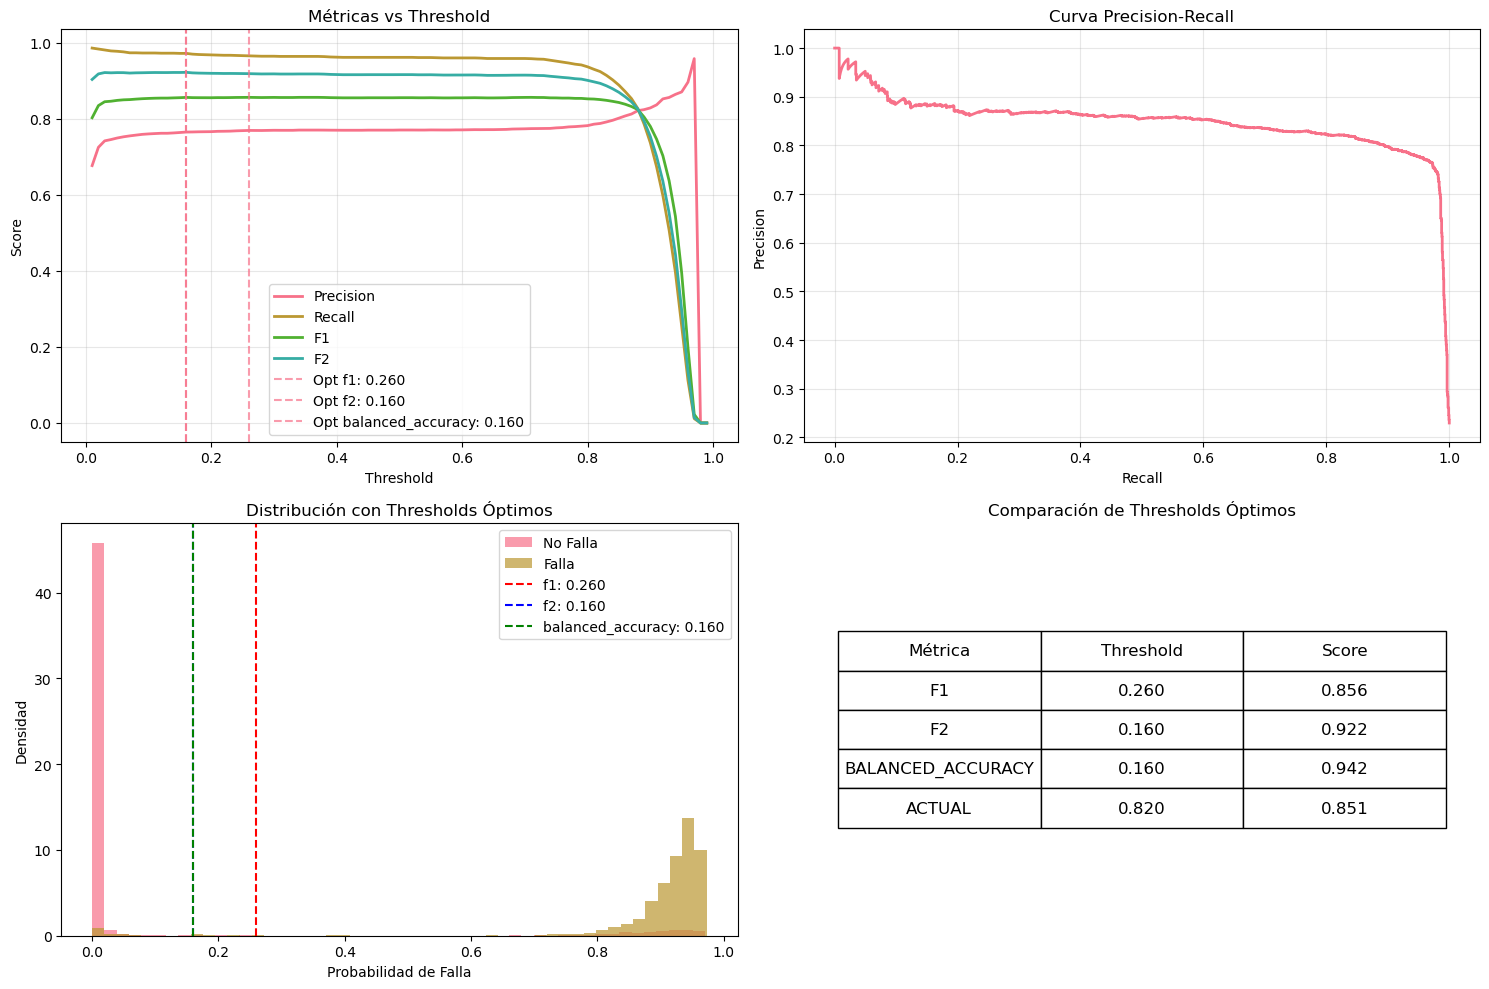

In [119]:
def umbral_mejoria(model, X_test, y_test, metric='f1'):
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_recall_curve, roc_curve
    probas = model.predict_proba(X_test)[:, 1]
    thresholds = np.linspace(0.01, 0.99, 99)   
    metrics_data = {
        'threshold': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'f2': [],  
        'specificity': [],
        'balanced_accuracy': []
    }
    for thresh in thresholds:
        y_pred = (probas >= thresh).astype(int) 
        if len(np.unique(y_pred)) > 1:
            prec = precision_score(y_test, y_pred, zero_division=0)
            rec = recall_score(y_test, y_pred, zero_division=0)
            f1 = f1_score(y_test, y_pred, zero_division=0)
            f2 = (5 * prec * rec) / (4 * prec + rec) if (prec + rec) > 0 else 0
            tn = ((y_test == 0) & (y_pred == 0)).sum()
            fp = ((y_test == 0) & (y_pred == 1)).sum()
            spec = tn / (tn + fp) if (tn + fp) > 0 else 0
            bal_acc = (rec + spec) / 2      
        else:
            prec = rec = f1 = f2 = spec = bal_acc = 0
        metrics_data['threshold'].append(thresh)
        metrics_data['precision'].append(prec)
        metrics_data['recall'].append(rec)
        metrics_data['f1'].append(f1)
        metrics_data['f2'].append(f2)
        metrics_data['specificity'].append(spec)
        metrics_data['balanced_accuracy'].append(bal_acc)
    optimal_thresholds = {}
    for metric_name in ['f1', 'f2', 'balanced_accuracy']:
        idx = np.argmax(metrics_data[metric_name])
        optimal_thresholds[metric_name] = {
            'threshold': metrics_data['threshold'][idx],
            'score': metrics_data[metric_name][idx]
        }
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes[0,0].plot(metrics_data['threshold'], metrics_data['precision'], label='Precision', linewidth=2)
    axes[0,0].plot(metrics_data['threshold'], metrics_data['recall'], label='Recall', linewidth=2)
    axes[0,0].plot(metrics_data['threshold'], metrics_data['f1'], label='F1', linewidth=2)
    axes[0,0].plot(metrics_data['threshold'], metrics_data['f2'], label='F2', linewidth=2)
    for metric_name, data in optimal_thresholds.items():
        axes[0,0].axvline(data['threshold'], linestyle='--', alpha=0.7, 
                         label=f'Opt {metric_name}: {data["threshold"]:.3f}') 
    axes[0,0].set_xlabel('Threshold')
    axes[0,0].set_ylabel('Score')
    axes[0,0].set_title('Métricas vs Threshold')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_test, probas)
    axes[0,1].plot(recall_curve, precision_curve, linewidth=2)
    axes[0,1].set_xlabel('Recall')
    axes[0,1].set_ylabel('Precision')
    axes[0,1].set_title('Curva Precision-Recall')
    axes[0,1].grid(True, alpha=0.3)
    axes[1,0].hist(probas[y_test == 0], alpha=0.7, bins=50, label='No Falla', density=True)
    axes[1,0].hist(probas[y_test == 1], alpha=0.7, bins=50, label='Falla', density=True)
    
    colors = ['red', 'blue', 'green']
    for i, (metric_name, data) in enumerate(optimal_thresholds.items()):
        axes[1,0].axvline(data['threshold'], color=colors[i], linestyle='--', 
                         label=f'{metric_name}: {data["threshold"]:.3f}')
    
    axes[1,0].set_xlabel('Probabilidad de Falla')
    axes[1,0].set_ylabel('Densidad')
    axes[1,0].set_title('Distribución con Thresholds Óptimos')
    axes[1,0].legend()
    axes[1,1].axis('off')
    table_data = []
    headers = ['Métrica', 'Threshold', 'Score']
    for metric_name, data in optimal_thresholds.items():
        table_data.append([metric_name.upper(), f"{data['threshold']:.3f}", f"{data['score']:.3f}"])
    current_thresh = model.optimal_threshold
    current_pred = (probas >= current_thresh).astype(int)
    current_f1 = f1_score(y_test, current_pred)
    table_data.append(['ACTUAL', f"{current_thresh:.3f}", f"{current_f1:.3f}"])
    
    table = axes[1,1].table(cellText=table_data, colLabels=headers,
                           cellLoc='center', loc='center',
                           colWidths=[0.3, 0.3, 0.3])
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 2)
    axes[1,1].set_title('Comparación de Thresholds Óptimos')
    
    plt.tight_layout()
    plt.show()
    
    return optimal_thresholds, metrics_data
print("Análisis detallado del threshold actual:")
optimal_analysis = umbral_mejoria(lstm_improved, X_test, y_test)

In [120]:
best_model, best_eval, prob_analysis = model_comparacion(
    ensemble_model, lstm_improved,
    X_train, y_train, X_test, y_test
)

COMPARACION DE MODELOS

 Ensemble 
Modelo entrenado correctamente
Predicciones generadas
Precision: 0.967
Recall: 0.979
F1-Score: 0.973
Model Done :D 

Matriz de Confusion
[[6674   67]
 [  43 1965]]
 Ensemble evaluado correctamente

 LSTM Mejorado 
Modelo entrenado correctamente
Predicciones generadas
Precision: 0.788
Recall: 0.924
F1-Score: 0.851
AUC: 0.964

Matriz de Confusion
[[6241  500]
 [ 152 1856]]
 LSTM Mejorado evaluado correctamente

 RESULTADOS: 

Tabla Comparativa:
                 auc  precision  recall     f1
Ensemble       0.500      0.967   0.979  0.973
LSTM Mejorado  0.964      0.788   0.924  0.851

Scores Ponderados:
Ensemble: 0.831
LSTM Mejorado: 0.891

MODELO GANADOR: LSTM Mejorado
   Score ponderado: 0.891
   AUC: 0.964
   F1-Score: 0.851
   Recall: 0.924
   Precision: 0.788

 ANÁLISIS DE PROBABILIDADES

Estadísticas básicas:
Media: 0.2655
Mediana: 0.0031
Desv. Estándar: 0.4113
Mínimo: 0.0003
Máximo: 0.9730

Casos de alta probabilidad (>= 0.7): 2488
  Tasa real de 

In [121]:
best_model

<Sequential name=sequential_2, built=True>

In [122]:
def prediciendo_el_futuro(model,
                     scaler,
                     df,
                     device_id,
                     feature_cols,
                     seq_len=5,
                     thresh=0.5,
                     date_col="timestamp"):
    if date_col not in df.columns:
        raise KeyError(f"'{date_col}' no está en el DataFrame")
    hist = (df[df["device"] == device_id]
            .sort_values(date_col)
            .reset_index(drop=True))
    if hist.empty:
        raise ValueError(f"Dispositivo '{device_id}' no encontrado")
    if len(hist) == 0:
        raise ValueError(f"No hay datos históricos para dispositivo '{device_id}'")
    window = hist.tail(seq_len).copy()
    if len(window) < seq_len:
        first_row = window.iloc[0:1]
        pad = pd.concat([first_row] * (seq_len - len(window)), ignore_index=True)
        window = pd.concat([pad, window], ignore_index=True)
    if window[feature_cols].isnull().any().any():
        print(f"⚠️  Advertencia: Valores NaN detectados, rellenando con último valor válido")
        window[feature_cols] = window[feature_cols].fillna(method='ffill').fillna(0)
    X_scaled = scaler.transform(window[feature_cols].astype("float32"))
    X_seq    = X_scaled.reshape(1, seq_len, len(feature_cols))
    y_hat = model.predict(X_seq, verbose=0) 
    prob  = float(y_hat.ravel()[0])
    pred  = int(prob >= thresh)
    last_ts  = window[date_col].iloc[-1]
    next_ts  = last_ts + 1 
    return {
        "device":      device_id,
        "next_step":   next_ts,
        "probability": prob,
        "pred_class":  pred,
        "confidence":  abs(prob - 0.5) * 2,
        "last_timestamp": last_ts,
        "data_points_used": len(hist)
    }

In [123]:
def prediciendo_el_futuro(model,
                     scaler,
                     df,
                     device_id,
                     feature_cols,
                     seq_len=5,
                     thresh=0.5,
                     date_col="timestamp"):
    if date_col not in df.columns:
        raise KeyError(f"'{date_col}' no está en el DataFrame")
    hist = (df[df["device"] == device_id]
            .sort_values(date_col)
            .reset_index(drop=True))
    if hist.empty:
        raise ValueError(f"Dispositivo '{device_id}' no encontrado")
    window = hist.tail(seq_len).copy()
    if len(window) < seq_len:
        pad = pd.concat([window.iloc[[0]]] * (seq_len - len(window)),
                        ignore_index=True)
        window = pd.concat([pad, window], ignore_index=True)
    if window[feature_cols].isnull().any().any():
        window[feature_cols] = (window[feature_cols]
                                .fillna(method="ffill")
                                .fillna(0))
    X_scaled = scaler.transform(window[feature_cols].astype("float32"))
    X_seq    = X_scaled.reshape(1, seq_len, len(feature_cols))
    y_hat = model(X_seq, training=False)
    prob  = float(y_hat.numpy().ravel()[0])
    pred  = int(prob >= thresh)
    last_ts = window[date_col].iloc[-1]
    return {
        "device":      device_id,
        "next_step":   last_ts + 1,
        "probability": prob,
        "pred_class":  pred,
        "confidence":  abs(prob - 0.5) * 2,
        "last_timestamp": last_ts,
        "data_points_used": len(hist)
    }


In [124]:
result = prediciendo_el_futuro(
    best_model, scaler, df_featured, "S1F01085",
    feature_cols, seq_len=SEQ_LEN, thresh=THRESH
)

In [125]:
result

{'device': 'S1F01085',
 'next_step': 6,
 'probability': 0.12484928965568542,
 'pred_class': 0,
 'confidence': 0.7503014206886292,
 'last_timestamp': 5,
 'data_points_used': 6}

In [126]:
def mensaje_falla(result: dict) -> str:
    dispositivo   = result["device"]
    prob_falla    = result["probability"] * 100          
    proximo_dia   = result["next_step"]                 
    confianza_pct = result["confidence"] * 100           
    estado = (
        "POSIBLE FALLA :O "
        if result["pred_class"] == 1
        else "OPERACIÓN NORMAL :D"
    )
    return (
        f"El dispositivo **{dispositivo}** tiene una probabilidad del "
        f"**{prob_falla:.1f}%** de fallar en el próximo paso temporal "
        f"({proximo_dia}).\n"
        f"Nivel de confianza: **{confianza_pct:.1f}%**. {estado}"
    )
print(mensaje_falla(result))


El dispositivo **S1F01085** tiene una probabilidad del **12.5%** de fallar en el próximo paso temporal (6).
Nivel de confianza: **75.0%**. OPERACIÓN NORMAL :D


In [127]:
from pathlib import Path

Path("models").mkdir(exist_ok=True)       # crea la carpeta si no existe
#best_model.save("models/best_model.keras")  # ✔ formato nativo
